# The Capital Asset Pricing Model

The Capital Asset Pricing Model measures the risk premium for a capital investment by comparing the expected return on that investment with the expected return of the entire market. In order to get we will use the equation:
$$
r_d - r_f = \beta(r_m - r_f)
$$
Where $r_d$ is the discount rate. and $r_m$ is the expected return on the stock market and 
$r_f$ is the risk free, which we will use  US. government bonds as the risk free rate. $\beta$
is called asset beta, it measures the sensitivity of the asset's return to market movements, therefore this is the assets *nondiversifiable risk*. This is the covariance of the growth of Tesla and the S&P 500. 

   ## Finding $ \beta$
   
 $\beta$ Is the measured by taking the covariance of the daily returns of the stock market and the Tesla divided over the variance of the return of the stock market.
 
 $$ \beta = \frac{Cov(R_m, R_T)}{Var(R_m)}$$ 

In which $R_T$ is the daily return of Tesla  and $R_m$ the return of the S&P 500.



In [4]:
#For Time and Dates
import datetime as dt

#For plotting
import matplotlib.pyplot as plt
from matplotlib import style

#For Data Wrangling
import pandas as pd 
import numpy as np
#import Quandl # stock data 

#For Web Scrapping
import pandas_datareader.data as web

#For statistical tools
import statsmodels.api as sm

In [5]:
start=dt.datetime(2000,1,1)
todayraw=str(pd.to_datetime("today")).split()[0]
todaylist=[int(i) for i in todayraw.split("-")]
end=dt.datetime(todaylist[0],todaylist[1],todaylist[2])
df =web.DataReader('TSLA','yahoo',start,end)
##This loads data for Tesla


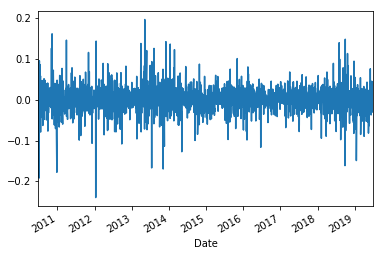

In [6]:
df["Daily Return"]=(df["Adj Close"]-df["Adj Close"].shift(1))/df["Adj Close"]
moving_slope_avg = df["Daily Return"].mean()
df["Daily Return"].plot()

This is the daily return for Tesla. Next We find the daily return for the SP 500

In [7]:
start = dt.datetime(2000,1,1)
end = dt.datetime(todaylist[0],todaylist[1],todaylist[2])
df_SPY = web.DataReader('SPY','yahoo',start,end)
df_SPY = df_SPY.rename(index=str, columns={"Low": "Low SPY", "Open": "Open SPY","Close":"Close SPY","Volume": "Volume SPY","Adj Close":"Adj Close SPY","High":"High SPY"})
df_SPY.index = pd.to_datetime(df_SPY.index)
df_SPY.head()

,High SPY,Low SPY,Open SPY,Close SPY,Volume SPY,Adj Close SPY
Date,,,,,,
2000-01-03,148.250000,143.875000,148.250000,145.4375,8164300.0,100.934456
2000-01-04,144.062500,139.640594,143.531204,139.7500,8089800.0,96.987358
2000-01-05,141.531204,137.250000,139.937500,140.0000,12177900.0,97.160812
2000-01-06,141.500000,137.750000,139.625000,137.7500,6227200.0,95.599327
2000-01-07,145.750000,140.062500,140.312500,145.7500,8066500.0,101.151382


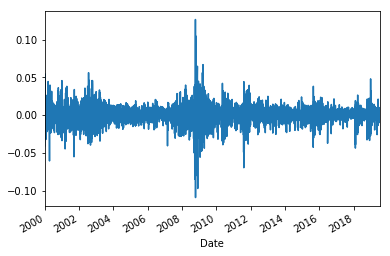

In [8]:
df_SPY["Daily Return SPY"] = (df_SPY["Adj Close SPY"]-df_SPY["Adj Close SPY"].shift(1))/df_SPY["Adj Close SPY"]
df_SPY.index = pd.to_datetime(df_SPY.index)
df_SPY["Daily Return SPY"].plot()


This is the daily return of the S&P 500.

### Finding the covariance 



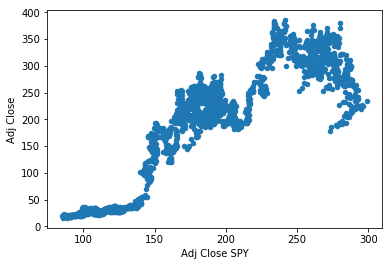

In [9]:
merged=pd.concat([df,df_SPY],axis=1,join_axes=[df_SPY.index])
merged=merged.dropna()
merged.plot.scatter(y="Adj Close",x="Adj Close SPY")

This scatter plot shows that there is some relation between the movements of the stockmarket and the movements of Tesla. 


#### Covariance and Variance Values 

We are going to use numpy's covariance function `numpy.cov` to get a matrix of variance values which give you the corresponding variances. 
$ X_{ij}$ gives you the Variance of the i row with the corresponding j column which happen to be made out of our two columns of the daily return of Tesla and the S&P 500. 

In [15]:
cov=np.cov(merged["Daily Return"],merged["Daily Return SPY"])
print(cov)##This is the covariance matrix
var_of_SPY=cov[1][1]
covar=cov[0][1]
var_of_SPY

[[1.04364654e-03 1.07622220e-04]
 [1.07622220e-04 8.33648961e-05]]


8.336489610593157e-05

Now that we have all the values we compute $\beta$

In [20]:
beta=covar/var_of_SPY
print("beta is equal to {0:.2f}".format(beta))

beta is equal to 1.29
